In [1]:
import sqlite3

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn import svm
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [37]:
connection = sqlite3.connect('races.db')
table_name = 'e_qualifying_results_table'
query = f'SELECT * FROM "{table_name}"'
data = pd.read_sql_query(query, connection)

data = data.reset_index(drop=True)

In [38]:
data.head()

,grid,driver_name,car,qualifying_time,season,round,No
0,1,Keke Rosberg ROS,Williams Honda,1:34.526,1983,1,1
1,2,Alain Prost PRO,Renault,1:34.672,1983,1,15
2,3,Patrick Tambay TAM,Ferrari,1:34.758,1983,1,27
3,4,Nelson Piquet PIQ,Brabham BMW,1:35.114,1983,1,5
4,5,Derek Warwick WAR,Toleman Hart,1:35.206,1983,1,35


In [59]:
a = data[data['grid'] == 1]
a

,grid,driver_name,car,qualifying_time,season,round,No
0,1,Keke Rosberg ROS,Williams Honda,1:34.526,1983,1,1
26,1,Patrick Tambay TAM,Ferrari,1:26.117,1983,2,27
52,1,Alain Prost PRO,Renault,1:36.672,1983,3,15
78,1,Rene Arnoux ARN,Ferrari,1:31.238,1983,4,28
104,1,Alain Prost PRO,Renault,1:24.840,1983,5,15
124,1,Alain Prost PRO,Renault,2:04.615,1983,6,15
150,1,Rene Arnoux ARN,Ferrari,1:44.734,1983,7,28
176,1,Rene Arnoux ARN,Ferrari,1:28.729,1983,8,28
202,1,Rene Arnoux ARN,Ferrari,1:09.462,1983,9,28
228,1,Patrick Tambay TAM,Ferrari,1:49.328,1983,10,27


In [60]:
a = pd.DataFrame(a.driver_name.value_counts().reset_index(drop=False))
a = a.rename(columns={'index':'driver', 'driver_name': 'pole positions'})
a


,driver,pole positions
0,Lewis Hamilton HAM,104
1,Michael Schumacher MSC,68
2,Ayrton Senna SEN,65
3,Sebastian Vettel VET,57
4,Nigel Mansell MAN,32
5,Max Verstappen VER,30
6,Nico Rosberg ROS,30
7,Alain Prost PRO,26
8,Mika Hakkinen HAK,26
9,Fernando Alonso ALO,22


<AxesSubplot: >

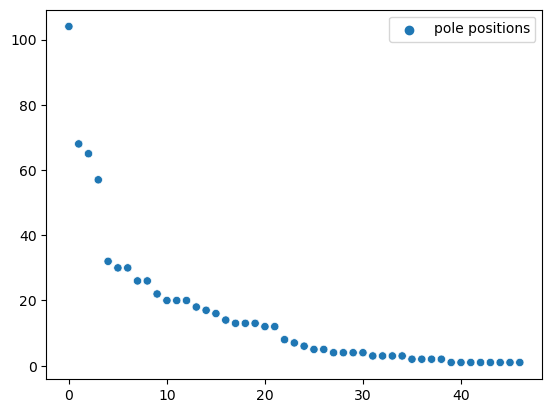

In [65]:
sns.scatterplot(a)